In [2]:
import numpy as np
import matplotlib.pyplot as plt

$\Huge \textbf{Paramètres globaux}$
---------------------------------------------------------------------------


In [3]:
NB_ELEVES = 100            # Nombre d'étudiants
DUREE_MOOC = 10            # Durée du contenu vidéo (heures)
DUREE_VISIONNAGE = 10      # en heures 
MIX_ELEC_FR = 0.0519       # kgCO2e/kWh

$\Huge \textbf{Paramètres pour les terminaux}$
----------------------------------------------------

In [4]:
NB_SMARTPHONE = 40       # 40 des 100
NB_LAPTOP = 40           # 40 des 100
NB_PC_FIXE = 20          # 20 des 100

$\Huge \textbf{Structures des terminaux}$

* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie du terminal.
* $\textbf{usage\_moyen}$ : représente l'usage moyen du terminal en $\text{kWh}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).






In [5]:
appareil = {
    'smartphone': {
        'duree_vie': 3, 'duree_utilisation': 3, 
        'heures_tot': 3*365*3, 'usage_moyen': 3.9,
        'gwp': 79.5, 'adpe': 0.00283, 'adpf': 813
    },
    'laptop': {
        'duree_vie': 5, 'duree_utilisation': 6,
        'heures_tot': 5*365*6, 'usage_moyen': 29.1,
        'gwp': 185, 'adpe': 0.00951, 'adpf': 2480
    },
    'pc_fixe': {
        'duree_vie': 5, 'duree_utilisation': 3,
        'heures_tot': 5*365*3, 'usage_moyen': 100,
        'gwp': 268, 'adpe': 0.022, 'adpf': 4790
    },
    'ecran': {
        'duree_vie': 5, 'duree_utilisation': 3,
        'heures_tot': 5*365*3, 'usage_moyen': 70,
        'gwp': 69.8, 'adpe': 0.0117, 'adpf': 1350
    }
}

$\Huge \textbf{Calcul impact des terminaux (hors usage) (unité : kg CO2 eq)}$ 

In [6]:
def impact_terminal(appareil):
    return appareil['gwp']*(DUREE_VISIONNAGE/appareil['heures_tot'])

In [7]:
impact_agrege_sm = impact_terminal(appareil["smartphone"])
impact_agrege_pc = impact_terminal(appareil["pc_fixe"]) + impact_terminal(appareil['ecran'])
impact_agrege_op = impact_terminal(appareil["laptop"])
impact_agrege_tot = NB_PC_FIXE*impact_agrege_pc + NB_LAPTOP*impact_agrege_op + NB_SMARTPHONE*impact_agrege_sm
print(f"L'impact total des terminaux hors usage est {impact_agrege_tot:.2f} kg CO₂ eq")

L'impact total des terminaux hors usage est 28.78 kg CO₂ eq


$\Huge \textbf{Calcul impact de l'usage des terminaux (unité : kg CO2 eq)}$

$$
\text{Impact}_{\text{Usage}} = \underbrace{\left( \frac{\text{Usage Annuel Moyen ADEME (kWh)}}{\text{Nbre Jours} \times \text{Usage Quotidien (h)}} \right)}_{\text{Puissance Moyenne (kW)}} \times \underbrace{\text{10 h}}_{\text{Durée MOOC}} \times \underbrace{0,052}_{\text{Mix France}}
$$

In [8]:
def impact_usage_terminal(appareil):
    return (appareil['usage_moyen']/(365*appareil['duree_utilisation']))*DUREE_MOOC*MIX_ELEC_FR

In [9]:
impact_usage_sm = impact_usage_terminal(appareil['smartphone'])
impact_usage_op = impact_usage_terminal(appareil["laptop"])
impact_usage_pc = impact_usage_terminal(appareil['pc_fixe']) + impact_usage_terminal(appareil['ecran'])
impact_usage_tot = NB_PC_FIXE*impact_usage_pc + NB_LAPTOP*impact_usage_op + NB_SMARTPHONE*impact_usage_sm
print(f"L'impact total de l'usage des terminaux est {impact_usage_tot:.2f} kg CO₂ eq")

L'impact total de l'usage des terminaux est 1.96 kg CO₂ eq


$\Huge \textbf{Calcul impact total des terminaux (unité : kg CO2 eq)}$

In [10]:
impact_tot_ter = impact_usage_tot + impact_agrege_tot
print(f"L'impact total de l'usage des terminaux est {impact_tot_ter:.2f} kg CO₂ eq")

L'impact total de l'usage des terminaux est 30.74 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique des terminaux (unité : kg Sb eq)}$

In [11]:
def impact_abio(appareil):
    return appareil['adpe']*(DUREE_VISIONNAGE/appareil['heures_tot'])

In [12]:
impact_abio_sm = impact_abio(appareil["smartphone"])
impact_abio_pc = impact_abio(appareil["pc_fixe"]) + impact_abio(appareil['ecran'])
impact_abio_op = impact_abio(appareil["laptop"])
impact_abio_tot = NB_PC_FIXE*impact_abio_pc + NB_LAPTOP*impact_abio_op + NB_SMARTPHONE*impact_abio_sm
print(f"L'épuisement abiotique des terminaux est  {impact_abio_tot:.4f} kg Sb eq")

L'épuisement abiotique des terminaux est  0.0019 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des terminaux (unité : MJ)}$

$\text{Il faut aussi convertir l'énergie consommée pour l'usage des terminaux en énergie primaire pour avoir la totalité de l'impact}$

$$
\text{Conversion}_{\text{énergie consommée}} = \underbrace{\left( \frac{\text{Usage Annuel Moyen ADEME (kWh)}}{\text{Nbre Jours} \times \text{Usage Quotidien (h)}} \right)}_{\text{Puissance Moyenne (kW)}} \times \underbrace{\text{10 h}}_{\text{Durée MOOC}} \times \underbrace{2,3}_{\text{coef d'énergie primaire}} \times \underbrace{\text{3,6}}_{\text{1kWh=3,6MJ}}
$$

In [13]:
COEF_EP = 2.3   # kWh - pour 1 kWh d'électricité en énergie finale, 2,3 kWh d'énergie primaire auront été consommés en moyenne
def impact_ep(appareil):
    return appareil['adpf']*(DUREE_VISIONNAGE/appareil['heures_tot'])
def conversion_eCons_en_ePrim(appareil):
    return (appareil['usage_moyen']/(365*appareil['duree_utilisation']))*DUREE_MOOC*COEF_EP*3.6

In [14]:
# La conversion
ep_usage_sm = conversion_eCons_en_ePrim(appareil['smartphone'])
ep_usage_pc = conversion_eCons_en_ePrim(appareil['pc_fixe']) + conversion_eCons_en_ePrim(appareil['ecran'])
ep_usage_op = conversion_eCons_en_ePrim(appareil['laptop'])
ep_usage_tot = NB_PC_FIXE*ep_usage_pc + NB_LAPTOP*ep_usage_op + NB_SMARTPHONE*ep_usage_sm

In [15]:
impact_ep_sm = impact_ep(appareil['smartphone'])
impact_ep_pc = impact_ep(appareil['pc_fixe']) + impact_ep(appareil['ecran'])
impact_ep_op = impact_ep(appareil['laptop'])
impact_ep_tot = NB_PC_FIXE*impact_ep_pc + NB_LAPTOP*impact_ep_op + NB_SMARTPHONE*impact_ep_sm + ep_usage_tot
print(f"La consommation de l'énergie primaire des terminaux est  {impact_ep_tot:.2f} MJ")

La consommation de l'énergie primaire des terminaux est  726.78 MJ


$\Huge \textbf{Bilan de l'imapct des termianux pour le MOOC}$


In [16]:
print(f"L'impact total de changement climatique des terminaux est {impact_tot_ter:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des terminaux est  {impact_abio_tot:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des terminaux est  {impact_ep_tot:.2f} MJ")

L'impact total de changement climatique des terminaux est 30.74 kg CO₂ eq
L'épuisement abiotique des terminaux est  0.0019 kg Sb eq
La consommation de l'énergie primaire des terminaux est  726.78 MJ


$\Huge \textbf{Calculs impacts réseau}$
----------------------------------------------------

In [17]:
CONSO_DONNEES = 1.5                                     # 1.5 Go/h d'après notre hypothèse
VOL_DONNEES_PAR_ELEVE = CONSO_DONNEES*DUREE_VISIONNAGE  # 15 Go par élève

In [18]:
VOL_DONNES_RESEAU_FIXE = VOL_DONNEES_PAR_ELEVE*(NB_LAPTOP+NB_PC_FIXE)     # 900 Go de traffic par Wi-Fi (60*15)
VOL_DONNES_RESEAU_MOBILE = VOL_DONNEES_PAR_ELEVE*NB_SMARTPHONE            # 600 Go de traffic par 3G/4G/5G (40*15)
TOTAL_TRAFFIC_DONNES = VOL_DONNES_RESEAU_MOBILE + VOL_DONNES_RESEAU_FIXE  # 1500 Go de taffic total

$\Huge \textbf{Structures des réseaux}$
* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie .
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).

In [19]:
reseaux = {
    'fixe' : {'gwp':1.24e-03, 'adpe': 1.84e-07, 'adpf': 1.01e-01},
    'mobile' :{'gwp':1.31e-02, 'adpe': 8.15e-07, 'adpf': 1.43}
}

$\Huge \textbf{Calcul changement clmatique total des réseaux (unité : kg CO2 eq)}$

In [20]:
impact_res_cc_tot = VOL_DONNES_RESEAU_FIXE*reseaux['fixe']['gwp'] + VOL_DONNES_RESEAU_MOBILE*reseaux['mobile']['gwp']
print(f"L'impact du changement climatique total des réseaux est {impact_res_cc_tot:.2f} kg CO₂ eq")

L'impact du changement climatique total des réseaux est 8.98 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique des réseaux (unité : kg Sb eq)}$

In [21]:
impact_res_abio_tot = VOL_DONNES_RESEAU_FIXE*reseaux['fixe']['adpe'] + VOL_DONNES_RESEAU_MOBILE*reseaux['mobile']['adpe']
print(f"L'épuisement abiotique des réseaux est  {impact_res_abio_tot:.4f} kg Sb eq")

L'épuisement abiotique des réseaux est  0.0007 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des réseaux (unité : MJ)}$

In [22]:
impact_res_ep_tot = VOL_DONNES_RESEAU_FIXE*reseaux['fixe']['adpf'] + VOL_DONNES_RESEAU_MOBILE*reseaux['mobile']['adpf']
print(f"La cosommation de l'énergie primaire des réseaux est  {impact_res_ep_tot:.2f} MJ")

La cosommation de l'énergie primaire des réseaux est  948.90 MJ


$\Huge \textbf{Bilan de l'imapct des réseaux pour le MOOC}$

In [23]:
print(f"L'impact du changement climatique total des réseaux est {impact_res_cc_tot:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des réseaux est  {impact_res_abio_tot:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des réseaux est  {impact_res_ep_tot:.1f} MJ")

L'impact du changement climatique total des réseaux est 8.98 kg CO₂ eq
L'épuisement abiotique des réseaux est  0.0007 kg Sb eq
La consommation de l'énergie primaire des réseaux est  948.9 MJ


$\Huge \textbf{Calculs impacts serveur}$
----------------------------------------------------

In [24]:
USAGE_MOOC_DU_SERVEUR = 0.05
CONS_SERVEUR_ANNUEL = 1805       #kWh par an 
PUE = 1.6                        #1,6 pour le refroidissement et l'infrastructure

$\Huge \textbf{Structures du serveur}$

* $\textbf{duree\_utilisation}$ : est la durée de vie du serveur (donnée de la base de ADEME).
* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie .
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).

In [55]:
serveur = {'duree_utilisation': 5, 
           'gwp':7.66e+02, 
           'adpe': 1.86e-02, 
           'adpf': 1.18e+04,
           'usage_annuel': 149.536,  # 1805*1.6*0.0519
           'usage_mooc': 0.05,
           }

$\Huge \textbf{Calcul impact du serveur (hors usage) (unité : kg CO2 eq)}$ 

In [26]:
impact_agrege_serveur = (serveur['gwp']/serveur['duree_utilisation'])

$\Huge \textbf{Calcul de l'usage du serveur(unité : kg CO2 eq)}$ 

In [27]:
cons_reel_du_serv = CONS_SERVEUR_ANNUEL*PUE
impact_usage_annuel = cons_reel_du_serv * MIX_ELEC_FR

In [28]:
cc_serveur_mooc = (impact_agrege_serveur + impact_usage_annuel) * USAGE_MOOC_DU_SERVEUR
print(f"L'impact du changement climatique total du serveur est {cc_serveur_mooc:.2f} kg CO₂ eq")

L'impact du changement climatique total du serveur est 15.15 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique du serveur (unité : kg Sb eq)}$

In [29]:
impact_abio_serv = (serveur['adpe']/serveur['duree_utilisation'])*USAGE_MOOC_DU_SERVEUR
print(f"L'épuisement abiotique du serveur est  {impact_abio_serv:.4f} kg Sb eq")

L'épuisement abiotique du serveur est  0.0002 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des réseaux (unité : MJ)}$

Le calcul de la consomation de l'énergie primaire est fait en deux étape comme suit:$$EP_{\text{serveur}} = \underbrace{EP_{\text{matériel}}}_{\text{Fabrication amortie}} + \underbrace{EP_{\text{usage}}}_{\text{Consommation électrique}}$$ 
où
$$EP_{\text{matériel}} = \left( \frac{\text{ADPf}_{\text{total}}}{\text{Durée de vie}_{\text{ans}}} \right) \times \text{Allocation}_{\text{MOOC}}$$
et 
$$EP_{\text{usage}} = \underbrace{E_{\text{elec, finale}}}_{\text{(kWh)}} \times \underbrace{2,3}_{\text{Coeff. EP}} \times \underbrace{3,6}_{\text{Conv. MJ}}$$

In [30]:
impact_ep_serv = (serveur['adpf']/serveur['duree_utilisation'])*USAGE_MOOC_DU_SERVEUR
impact_ep_serv = impact_ep_serv + impact_usage_annuel*2.3*3.6
print(f"La consommation de l'énergie primaire du serveur est  {impact_ep_serv:.1f} MJ")

La consommation de l'énergie primaire du serveur est  1359.1 MJ


$\Huge \textbf{Bilan de l'imapct du serveur pour le MOOC}$

In [31]:
print(f"L'impact du changement climatique total du serveur est {cc_serveur_mooc:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des réseaux est  {impact_abio_serv:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des réseaux est  {impact_ep_serv:.1f} MJ")

L'impact du changement climatique total du serveur est 15.15 kg CO₂ eq
L'épuisement abiotique des réseaux est  0.0002 kg Sb eq
La consommation de l'énergie primaire des réseaux est  1359.1 MJ


$\Huge \textbf{Calcul de l'impact total}$
----------------------------------------------------

In [32]:
imapct_tot_cc = cc_serveur_mooc + impact_res_cc_tot + impact_tot_ter
impact_tot_abio = impact_abio_serv + impact_res_abio_tot + impact_abio_tot
impact_tot_ep = impact_ep_serv + impact_res_ep_tot + impact_ep_tot

In [33]:
print(f"L'impact du changement climatique total  est {imapct_tot_cc:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique total est  {impact_tot_abio:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire totale est  {impact_tot_ep:.1f} MJ")

L'impact du changement climatique total  est 54.87 kg CO₂ eq
L'épuisement abiotique total est  0.0028 kg Sb eq
La consommation de l'énergie primaire totale est  3034.7 MJ


$\Huge \textbf{Résultat et interprétations}$
----------------------------------------------------

$\Huge \textbf{Affichage des résultats obtenus}$


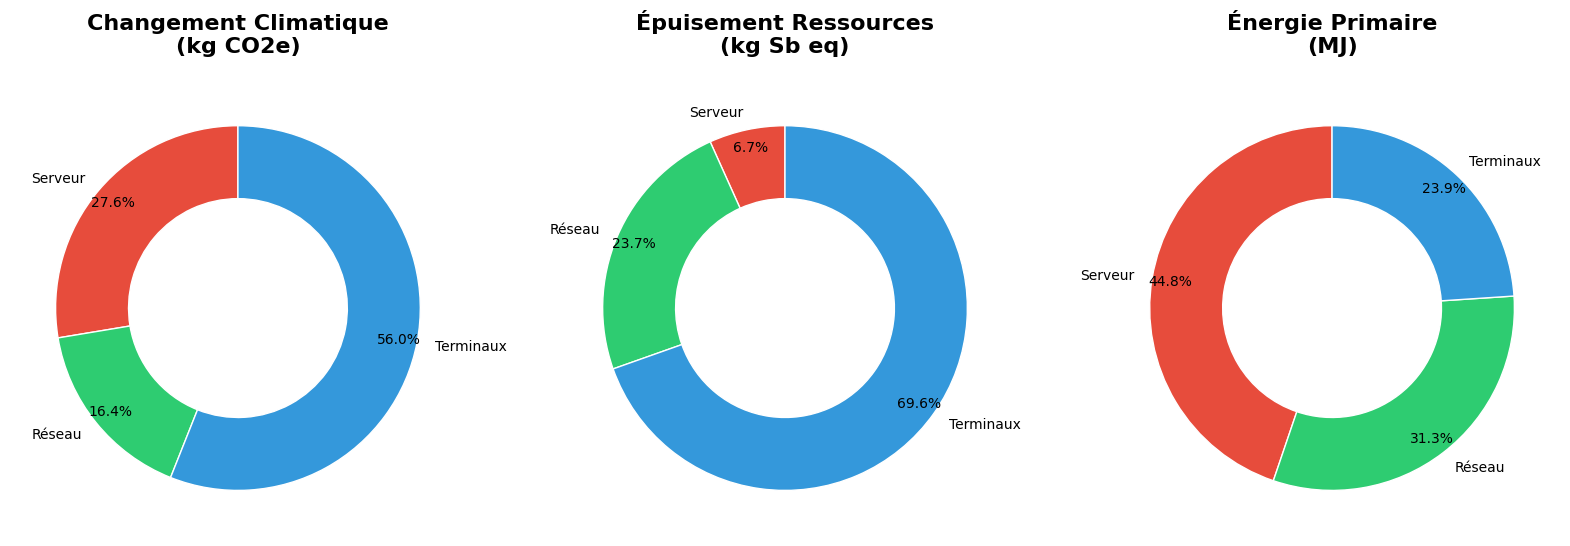

In [34]:
labels = ['Serveur', 'Réseau', 'Terminaux']
couleurs = ['#e74c3c', '#2ecc71', '#3498db']  # Rouge (Serv), Vert (Res), Bleu (Term)
donnee_plots = [
    {
        "titre": "Changement Climatique\n(kg CO2e)",
        "valeurs": [cc_serveur_mooc, impact_res_cc_tot, impact_tot_ter]
    },
    {
        "titre": "Épuisement Ressources\n(kg Sb eq)",
        "valeurs": [impact_abio_serv, impact_res_abio_tot, impact_abio_tot]
    },
    {
        "titre": "Énergie Primaire\n(MJ)",
        "valeurs": [impact_ep_serv, impact_res_ep_tot, impact_ep_tot]
    }
]

fig,axes = plt.subplots(1,3, figsize=(20,7))

for i , axe in enumerate(axes): 
    donnee = donnee_plots[i]
    valeurs= donnee["valeurs"]
    _,texts, autotexts = axe.pie(valeurs,
                                 labels=labels,
                                 colors=couleurs,
                                 autopct="%1.1f%%",
                                 startangle=90,
                                 pctdistance=0.9,
                                 wedgeprops={'width': 0.4, 'edgecolor': 'w'})
    axe.set_title(donnee["titre"],fontsize=16, pad=20, weight="bold")

$\Huge \textbf{Analyse de sensibilité}$
----------------------------------------------------

$\Huge \textbf{Paramètres sensibilité}$

In [ ]:
# Consommation de données selon qualité vidéo (Go/h)
consommation_donnees = {
    'SD': 0.7,
    'HD': 1.5,
    'FullHD': 3.0,
    '4K': 7.0
}

*


$\Huge \textbf{Fonctions des calculs précédents}$

In [60]:


def impact_terminal(appareil, duree=DUREE_VISIONNAGE):
    """Calcule l'impact d'un terminal (fabrication + usage)"""
    impact_agrege = appareil['gwp'] * (duree / appareil['heures_tot'])
    impact_usage = (appareil['usage_moyen'] / (365 * appareil['duree_utilisation'])) * duree * MIX_ELEC_FR
    
    adpe = appareil['adpe'] * (duree / appareil['heures_tot'])
    adpf = appareil['adpf'] * (duree / appareil['heures_tot']) + \
           (appareil['usage_moyen'] / (365 * appareil['duree_utilisation'])) * duree * COEF_EP * 3.6
    
    return {
        'gwp': impact_agrege + impact_usage,
        'adpe': adpe,
        'adpf': adpf
    }

def impact_reseau(volume_donnees_go, type_reseau):
    """Calcule l'impact du réseau pour un volume de données"""
    net = reseaux[type_reseau]
    return {
        'gwp': volume_donnees_go * net['gwp'],
        'adpe': volume_donnees_go * net['adpe'],
        'adpf': volume_donnees_go * net['adpf']
    }

def impact_serveur():
    """Retourne l'impact du serveur pour le MOOC"""
    impact_agrege_serveur = (serveur['gwp']/serveur['duree_utilisation'])
    cons_reel_du_serv = CONS_SERVEUR_ANNUEL*PUE
    impact_usage_annuel = cons_reel_du_serv * MIX_ELEC_FR
    impact_ep_serv = (serveur['adpf']/serveur['duree_utilisation'])*serveur['usage_mooc']
    impact_ep_serv = impact_ep_serv + impact_usage_annuel*2.3*3.6
    return {
        'gwp': (impact_agrege_serveur + impact_usage_annuel) * serveur['usage_mooc'],
        'adpe':  (serveur['adpe']/serveur['duree_utilisation'])* serveur['usage_mooc'],
        'adpf': impact_ep_serv
    }

def calcul_impact_total(nb_smartphone = NB_SMARTPHONE, nb_laptop = NB_LAPTOP, qualite_video='HD'):
    """
    Calcule l'impact total pour une configuration donnée
    
    Args:
        nb_smartphone: Nombre d'étudiants sur smartphone
        nb_laptop: Nombre d'étudiants sur laptop
        qualite_video: 'SD', 'HD', 'FullHD' ou '4K'
    
    Returns:
        dict avec les impacts par composant et totaux
    """
    nb_pc_fixe = NB_ELEVES - nb_smartphone - nb_laptop
    conso_donnees = consommation_donnees[qualite_video]
    vol_donnees_par_eleve = conso_donnees * DUREE_VISIONNAGE
    
    # Impacts terminaux
    imp_sm = impact_terminal(appareil['smartphone'])
    imp_lap = impact_terminal(appareil['laptop'])
    imp_pc = impact_terminal(appareil['pc_fixe'])
    imp_ecran = impact_terminal(appareil['ecran'])
    
    terminal_gwp = (nb_smartphone * imp_sm['gwp'] + 
                    nb_laptop * imp_lap['gwp'] + 
                    nb_pc_fixe * (imp_pc['gwp'] + imp_ecran['gwp']))
    
    terminal_adpe = (nb_smartphone * imp_sm['adpe'] + 
                     nb_laptop * imp_lap['adpe'] + 
                     nb_pc_fixe * (imp_pc['adpe'] + imp_ecran['adpe']))
    
    terminal_adpf = (nb_smartphone * imp_sm['adpf'] + 
                     nb_laptop * imp_lap['adpf'] + 
                     nb_pc_fixe * (imp_pc['adpf'] + imp_ecran['adpf']))
    
    # Impacts réseaux
    vol_fixe = vol_donnees_par_eleve * (nb_laptop + nb_pc_fixe)
    vol_mobile = vol_donnees_par_eleve * nb_smartphone
    
    imp_fixe = impact_reseau(vol_fixe, 'fixe')
    imp_mobile = impact_reseau(vol_mobile, 'mobile')
    
    reseau_gwp = imp_fixe['gwp'] + imp_mobile['gwp']
    reseau_adpe = imp_fixe['adpe'] + imp_mobile['adpe']
    reseau_adpf = imp_fixe['adpf'] + imp_mobile['adpf']
    
    # Impact serveur
    imp_serv = impact_serveur()
    
    return {
        'terminal': {'gwp': terminal_gwp, 'adpe': terminal_adpe, 'adpf': terminal_adpf},
        'reseau': {'gwp': reseau_gwp, 'adpe': reseau_adpe, 'adpf': reseau_adpf},
        'serveur': imp_serv,
        'total': {
            'gwp': terminal_gwp + reseau_gwp + imp_serv['gwp'],
            'adpe': terminal_adpe + reseau_adpe + imp_serv['adpe'],
            'adpf': terminal_adpf + reseau_adpf + imp_serv['adpf']
        }
    }

$\Huge \textbf{Mode de transmission}$

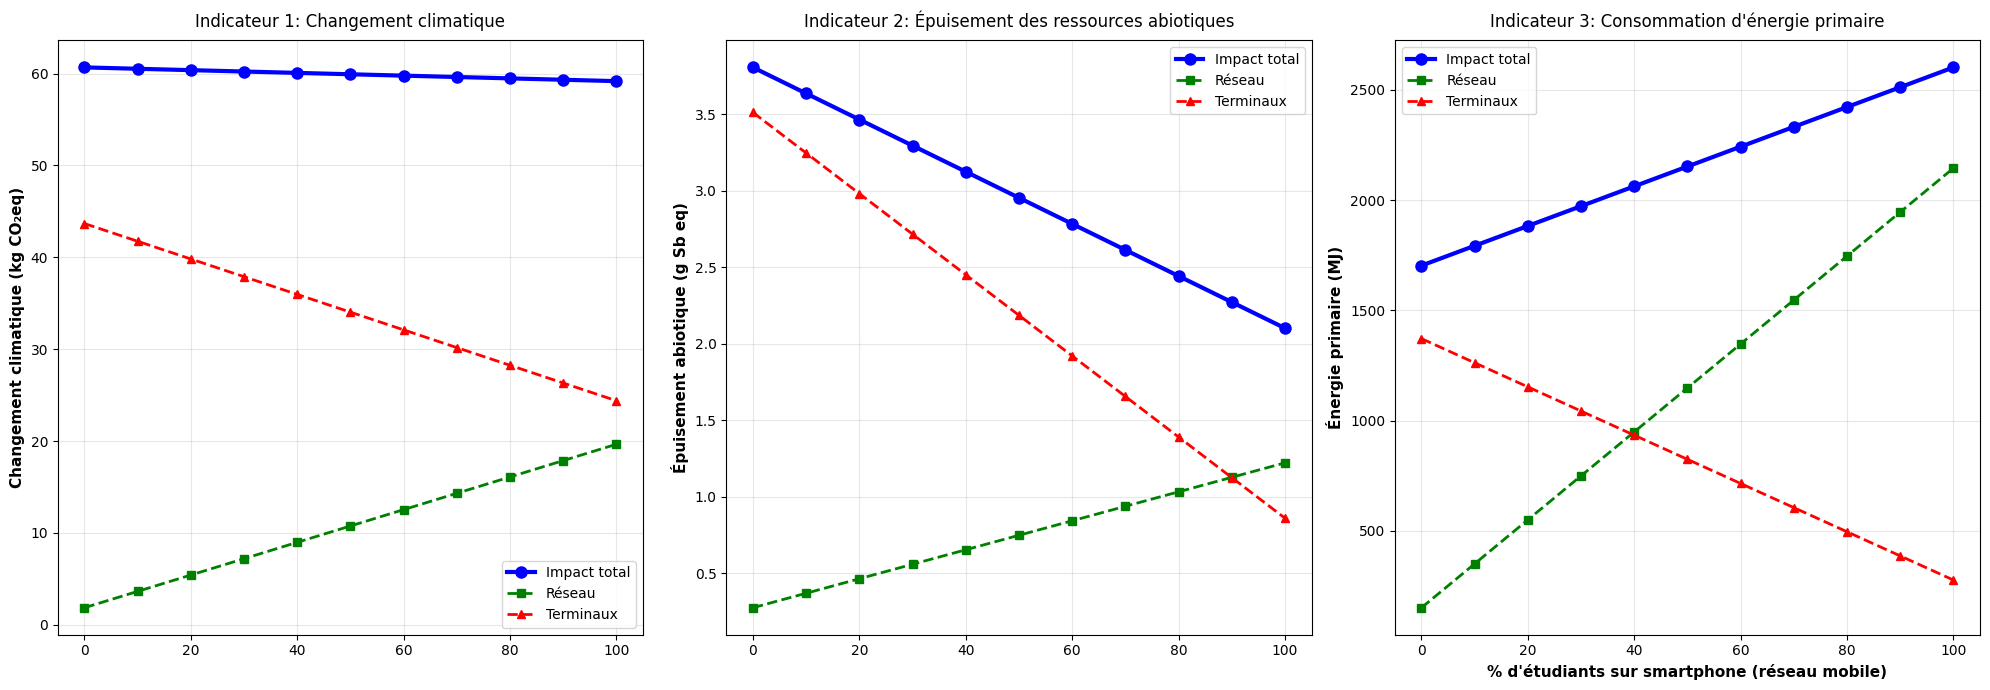

In [37]:
def analyse_mode_transmission(qualite='HD') : 
    """ 
    Analyse de l'influence de la répartission smartphone/laptop/pc
    """

    nb_smartphones = np.arange(0,101,10)
    impact_total_gwp =[]
    impact_reseau_gwp=[]
    impact_terminal_gwp =[]

    impact_total_adpe =[]
    impact_reseau_adpe=[]
    impact_terminal_adpe =[]

    impact_total_adpf =[]
    impact_reseau_adpf=[]
    impact_terminal_adpf =[]

    for nb_sm in nb_smartphones:
        nb_lap = (100 -nb_sm)//2
        impact = calcul_impact_total(nb_sm,nb_lap,qualite)
        impact_total_gwp.append(impact['total']['gwp'])
        impact_reseau_gwp.append(impact['reseau']['gwp'])
        impact_terminal_gwp.append(impact['terminal']['gwp'])
        impact_total_adpe.append(impact['total']['adpe'])
        impact_reseau_adpe.append(impact['reseau']['adpe'])
        impact_terminal_adpe.append(impact['terminal']['adpe'])
        impact_total_adpf.append(impact['total']['adpf'])
        impact_reseau_adpf.append(impact['reseau']['adpf'])
        impact_terminal_adpf.append(impact['terminal']['adpf'])

    fig,axes = plt.subplots(1,3,figsize=(20,7))

     # --- Graphique 1: Changement Climatique (GWP) ---
    axes[0].plot(nb_smartphones, impact_total_gwp, 'b-', linewidth=3, 
                 label='Impact total', marker='o', markersize=8)
    axes[0].plot(nb_smartphones, impact_reseau_gwp, 'g--', linewidth=2, 
                 label='Réseau', marker='s', markersize=6)
    axes[0].plot(nb_smartphones, impact_terminal_gwp, 'r--', linewidth=2, 
                 label='Terminaux', marker='^', markersize=6)
    
    axes[0].set_ylabel('Changement climatique (kg CO₂eq)', fontsize=11, fontweight='bold')
    axes[0].set_title('Indicateur 1: Changement climatique', fontsize=12, pad=10)
    axes[0].legend(fontsize=10, loc='best')
    axes[0].grid(True, alpha=0.3)
    
    # --- Graphique 2: Épuisement Abiotique (ADPE) ---
    axes[1].plot(nb_smartphones, np.array(impact_total_adpe)*1000, 'b-', linewidth=3, 
                 label='Impact total', marker='o', markersize=8)
    axes[1].plot(nb_smartphones, np.array(impact_reseau_adpe)*1000, 'g--', linewidth=2, 
                 label='Réseau', marker='s', markersize=6)
    axes[1].plot(nb_smartphones, np.array(impact_terminal_adpe)*1000, 'r--', linewidth=2, 
                 label='Terminaux', marker='^', markersize=6)
    
    axes[1].set_ylabel('Épuisement abiotique (g Sb eq)', fontsize=11, fontweight='bold')
    axes[1].set_title('Indicateur 2: Épuisement des ressources abiotiques', fontsize=12, pad=10)
    axes[1].legend(fontsize=10, loc='best')
    axes[1].grid(True, alpha=0.3)
    
    # --- Graphique 3: Énergie Primaire (ADPF) ---
    axes[2].plot(nb_smartphones, impact_total_adpf, 'b-', linewidth=3, 
                 label='Impact total', marker='o', markersize=8)
    axes[2].plot(nb_smartphones, impact_reseau_adpf, 'g--', linewidth=2, 
                 label='Réseau', marker='s', markersize=6)
    axes[2].plot(nb_smartphones, impact_terminal_adpf, 'r--', linewidth=2, 
                 label='Terminaux', marker='^', markersize=6)
    
    axes[2].set_ylabel('Énergie primaire (MJ)', fontsize=11, fontweight='bold')
    axes[2].set_xlabel('% d\'étudiants sur smartphone (réseau mobile)', fontsize=11, fontweight='bold')
    axes[2].set_title('Indicateur 3: Consommation d\'énergie primaire', fontsize=12, pad=10)
    axes[2].legend(fontsize=10, loc='best')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
        

analyse_mode_transmission()   

$\Huge \textbf{Indicateur global}$

## Conversion de l'energie primaire en MJ

$1 \text{kWh} = 3.6 \text{MJ}$ donc $ 1 TWh = 3.6 \times 10^9 \text{MJ}$

Population française en 2024 : 68.4 Millions 


In [38]:
(2575 * 3.6 * 10**9)/(68.4*10**6)

135526.31578947368

 Score total : 237.77622223998873
 Score terminaux : 128.91052567397531
 Score serveur : 48.22682530725984
 Score reseau : 60.638871258753575


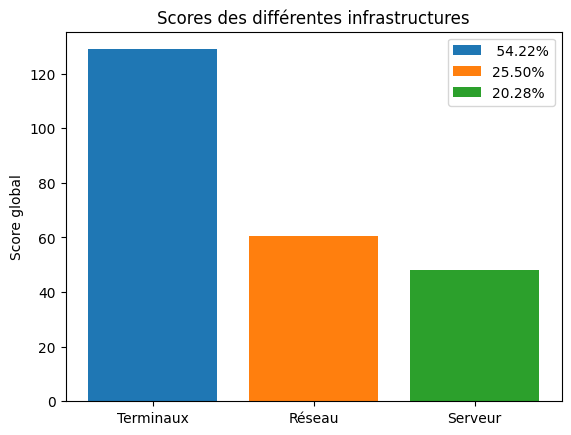

In [68]:
def calcul_score_global(gwp_total, adpe_total, adpf_total): 
    """
    Calcule un score global agrégé normalisé (Points Habitant).
    
    Arguments:
    - gwp_total : Impact Changement Climatique (kg CO2e)
    - adpe_total : Impact Ressources Minérales (kg Sb eq)
    - adpf_total : Impact Énergie Primaire (MJ)
    
    Returns:
    - score_final : Score en µPt (Micro-Points)
    - indices_norm : Dictionnaire contenant les scores normalisés unitaires
    """
    # Facteurs de normalisation 
    REF_GWP = 1E4
    REF_ADPE = 6.36E-02 
    REF_ADPF = 135526

    #indicateurs normalisés 
    gwp_norm = gwp_total/REF_GWP
    adpe_norm = adpe_total/REF_ADPE
    adpf_norm = adpf_total/REF_ADPF

    #score en considérant que chaques paramètres à la meme importance 
    score =(gwp_norm + adpe_norm +adpf_norm)*(1/3) *10000 # x 10 000 pour la lisibilité du score

    return score, {"gwp_norm" :gwp_norm,
                   "adpe_norm": adpe_norm,
                    "adpf_norm": adpf_norm} 

impact_total = calcul_impact_total(qualite_video='HD')

score_total,_ = calcul_score_global(impact_total['total']['gwp'],impact_total['total']['adpe'],impact_total['total']['adpf'])
score_terminal,_ = calcul_score_global(impact_total['terminal']['gwp'],impact_total['terminal']['adpe'],impact_total['terminal']['adpf'])
score_serveur,_ = calcul_score_global(impact_total['serveur']['gwp'],impact_total['serveur']['adpe'],impact_total['serveur']['adpf'])
score_reseau,_ = calcul_score_global(impact_total['reseau']['gwp'],impact_total['reseau']['adpe'],impact_total['reseau']['adpf'])


fig, ax = plt.subplots()
scores = [score_terminal,score_reseau,score_serveur]
appareils =  ['Terminaux', 'Réseau', 'Serveur']
bar_labels = [f" {(score_terminal/score_total)*100:.2f}%", f"{(score_reseau/score_total)*100:.2f}%", f"{(score_serveur/score_total)*100:.2f}%"]
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']
ax.bar(appareils,scores,label=bar_labels,color=bar_colors)
ax.set_ylabel("Score global")
ax.set_title("Scores des différentes infrastructures")
ax.legend()

print(f" Score total : {score_total}")
print(f" Score terminaux : {score_terminal}")
print(f" Score serveur : {score_serveur}")
print(f" Score reseau : {score_reseau}")

## Choix du terminal

299.3938932478801
232.35543686089613
18.811631079724123
292.6244180687234
215.12915163698204
29.268441124481495
285.8549428895668
197.90286641306807
39.725251169238845
279.08546771041006
180.67658118915398
50.1820612139962
272.3159925312534
163.45029596523995
60.638871258753575
265.5465173520966
146.22401074132588
71.09568130351091
258.77704217294
128.99772551741185
81.55249134826829
252.0075669937833
111.77144029349779
92.00930139302565
245.2380918146266
94.54515506958374
102.46611143778303
238.46861663546994
77.31886984566974
112.92292148254039
231.69914145631327
60.09258462175567
123.37973152729775


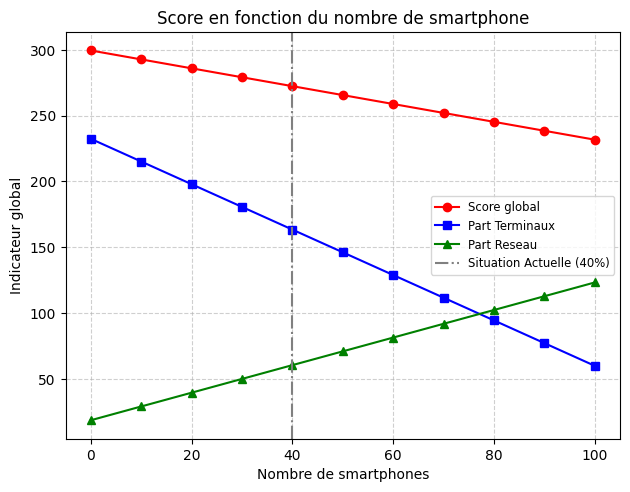

In [ ]:
def analyse_mode_transmission(qualite='HD') : 
    """ 
    Analyse de l'influence de la répartission smartphone/laptop/pc
    """

    nb_smartphones = np.arange(0,101,10)
    scores_total =[]
    scores_terminal=[]
    scores_reseau =[]


    for nb_sm in nb_smartphones:
        nb_lap = (100-nb_sm)//2
        impact = calcul_impact_total(nb_laptop=nb_lap, nb_smartphone=nb_sm)

        score_total,_ = calcul_score_global(impact['total']['gwp'],impact['total']['adpe'],impact['total']['adpf'])
        score_terminal,_ = calcul_score_global(impact['terminal']['gwp'],impact['terminal']['adpe'],impact['terminal']['adpf'])
        score_reseau,_ = calcul_score_global(impact['reseau']['gwp'],impact['reseau']['adpe'],impact['reseau']['adpf'])
        
        

        scores_total.append(score_total)
        scores_terminal.append(score_terminal)
        scores_reseau.append(score_reseau)
        

    
    plt.plot(nb_smartphones,scores_total,label="Score global",color="red", marker= 'o')
    plt.plot(nb_smartphones,scores_terminal,label="Part Terminaux", color ="blue", marker="s" )
    plt.plot(nb_smartphones,scores_reseau,label="Part Reseau",color="green", marker="^")
    plt.axvline(x=40, color='gray', linestyle='-.', label='Situation Actuelle (40%)')
    plt.grid(True, linestyle='--', alpha=0.6) # Quadrillage
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.xlabel("Nombre de smartphones")
    plt.ylabel("Indicateur global")
    plt.legend(fontsize='small')
    plt.tight_layout()
    plt.title("Score en fonction du nombre de smartphone")
    plt.show()
        

analyse_mode_transmission()   